In [ ]:

import sys
sys.path.append('dataloader')

from pair_dataset import PairDataset

from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
from tranformation_utils import *


DATASET_PATH = "dataloader/data/full/SAMPLE_001"

os.path.exists(DATASET_PATH)

rtstruct_path1 = (
    DATASET_PATH + "/RS.1.2.246.352.221.53086809173815688567595866456863246500.dcm"
)
rtstruct_path2 = (
    DATASET_PATH + "/RS.1.2.246.352.221.46272062591570509005209218152822185346.dcm"
)


DATASET_PATH = "dataloader/data/full/SAMPLE_002"

rtstruct_path1 = (
        DATASET_PATH +"/" + "/RS.1.2.246.352.221.4648407614349067913684963238765492101.dcm"
    )
rtstruct_path2 = (
        DATASET_PATH  +"/" +  "RS.1.2.246.352.221.5699426928750258714918816447807823764.dcm"
    )

# dataset = PairDataset(rtstruct_path1, rtstruct_path2)

size = 128
size = 1024
dataset = PairDataset(rtstruct_path2, rtstruct_path1, (size, size))

In [ ]:
#  do pair dataset nahradit           from dataloader.rs_dataset import RSDataset
y_cutoff = 90 * int(size / 128)

In [ ]:
import cv2 

def transform_masks(masks, fixed_image, global_transform, final_bspline_transform ):
    transformed_masks = []
    for mask in masks:
        print(mask.shape)
        # Convert to SimpleITK image
        mask_sitk = sitk.GetImageFromArray(mask)
        moved_mask = sitk.Resample(
            mask_sitk,
            fixed_image,
            global_transform,
            sitk.sitkLinear,
            0,
            mask_sitk.GetPixelID()
        )
        # Resample the mask using the transform
        deformed_mask = resample_with_transform(moved_mask, fixed_image, final_bspline_transform)

        transformed_masks.append(sitk.GetArrayFromImage(deformed_mask))
    return np.array(transformed_masks)



def draw_contours(img, masks):
    ct_img_colored = np.stack([img, img, img], axis=-1)
    colors = ['orange', 'red', 'blue']
    colors_rgb = {'orange': [1.0, 0.65, 0], 'red': [1.0, 0, 0], 'blue': [0, 0, 1.0]}
    
    for i in range(3):
        mask_layer = masks[i]
        # Convert to uint8 for findContours
        mask_uint8 = (mask_layer * 255).astype(np.uint8)
        contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Draw contours in the corresponding color
        color = colors_rgb[colors[i]]
        for contour in contours:
            cv2.drawContours(ct_img_colored, [contour], -1, color, 2)
    return ct_img_colored
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


CT batch shape: torch.Size([4, 1, 1024, 1024])


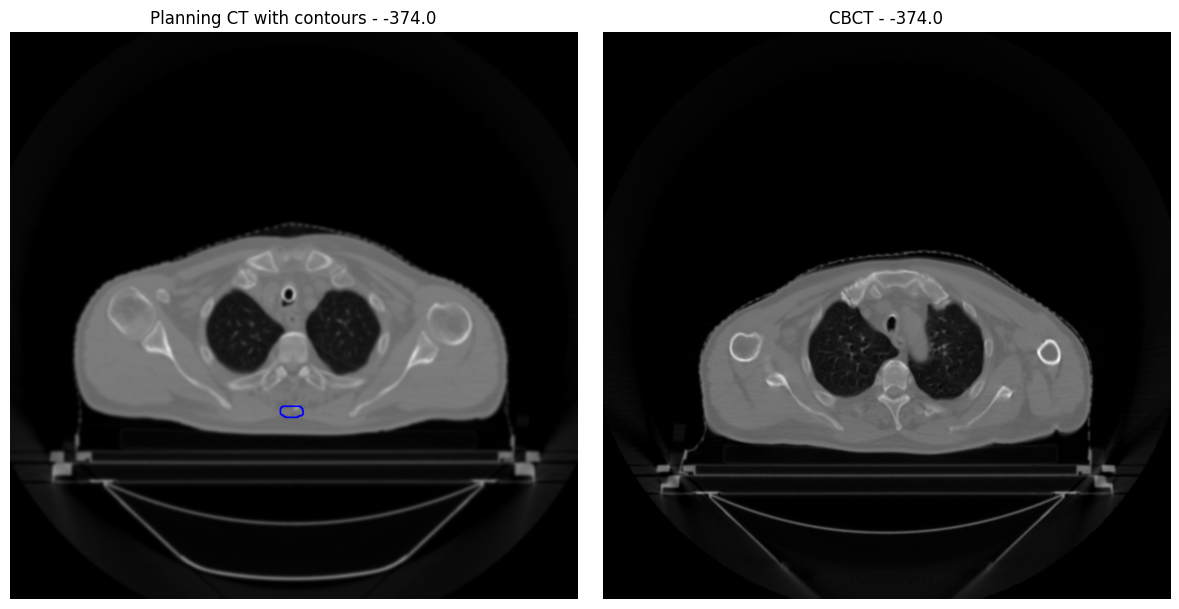

itk::simple::Euler2DTransform
 Euler2DTransform (0x7fd944df4f30)
   RTTI typeinfo:   itk::Euler2DTransform<double>
   Reference Count: 3
   Modified Time: 1246594
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0.000171929 
     -0.000171929 1 
   Offset: [-19.1053, -23.3299]
   Center: [511.5, 511.5]
   Translation: [-19.0174, -23.4179]
   Inverse: 
     1 -0.000171929 
     0.000171929 1 
   Singular: 0
   Angle: -0.000171929

Final BSpline registration metric value: -1.0536203596853795
Optimizer's stopping condition: LBFGSBOptimizerv4: User requested
(1024, 1024)
(1024, 1024)
(1024, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


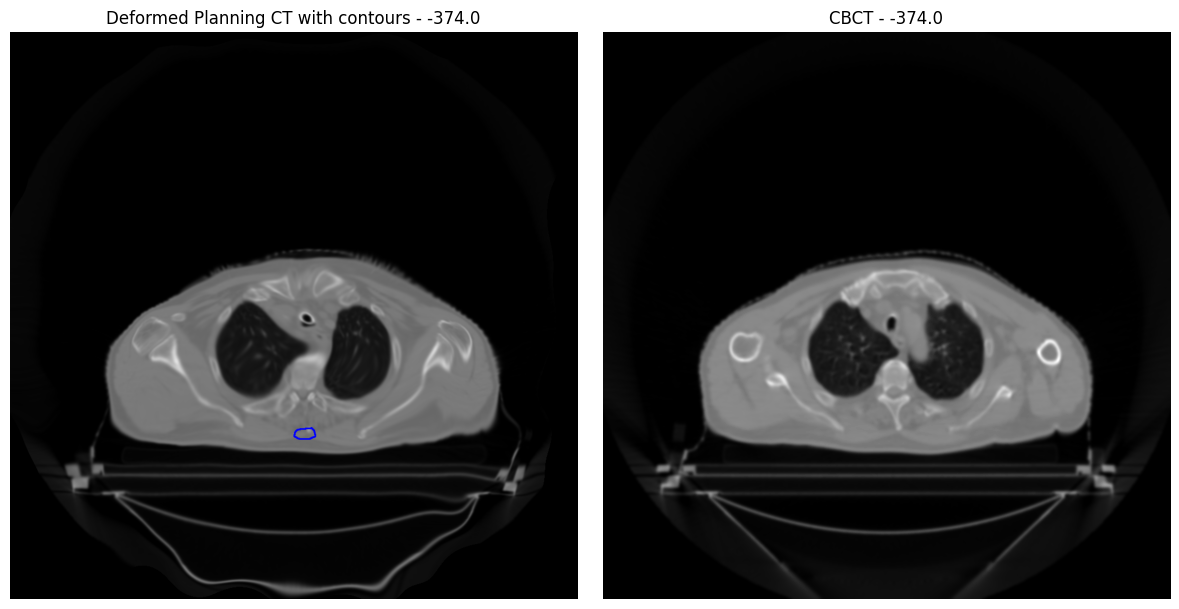

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


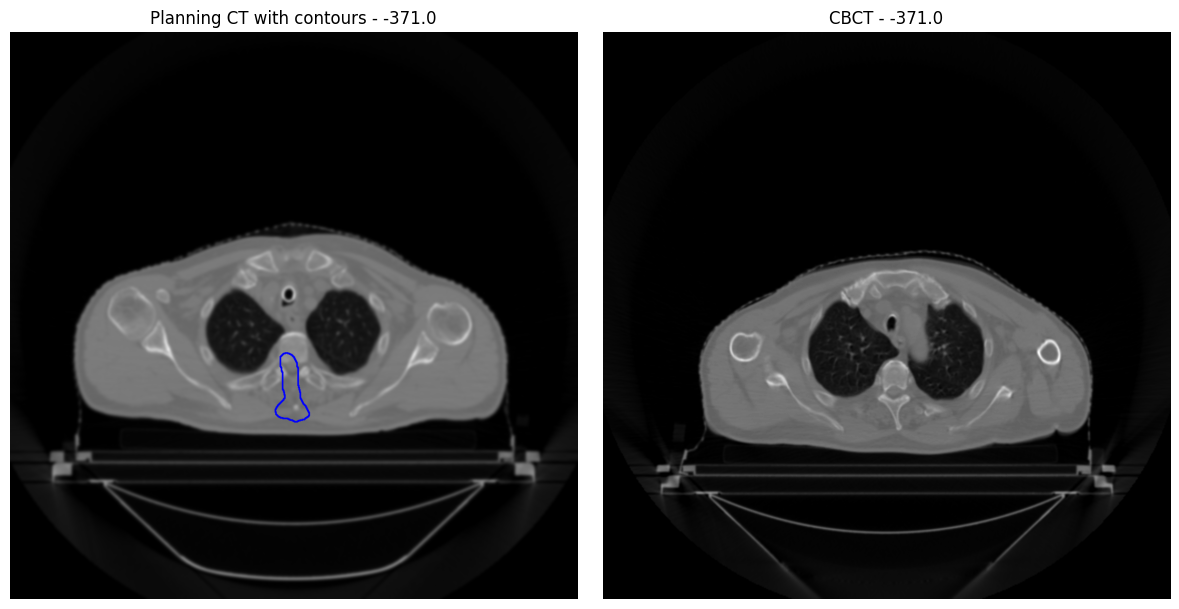

itk::simple::Euler2DTransform
 Euler2DTransform (0x7fd90b55f5e0)
   RTTI typeinfo:   itk::Euler2DTransform<double>
   Reference Count: 3
   Modified Time: 1502183
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0.000145007 
     -0.000145007 1 
   Offset: [-17.5358, -23.1781]
   Center: [511.5, 511.5]
   Translation: [-17.4616, -23.2523]
   Inverse: 
     1 -0.000145007 
     0.000145007 1 
   Singular: 0
   Angle: -0.000145007

Final BSpline registration metric value: -1.073513421755842
Optimizer's stopping condition: LBFGSBOptimizerv4: User requested
(1024, 1024)
(1024, 1024)
(1024, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


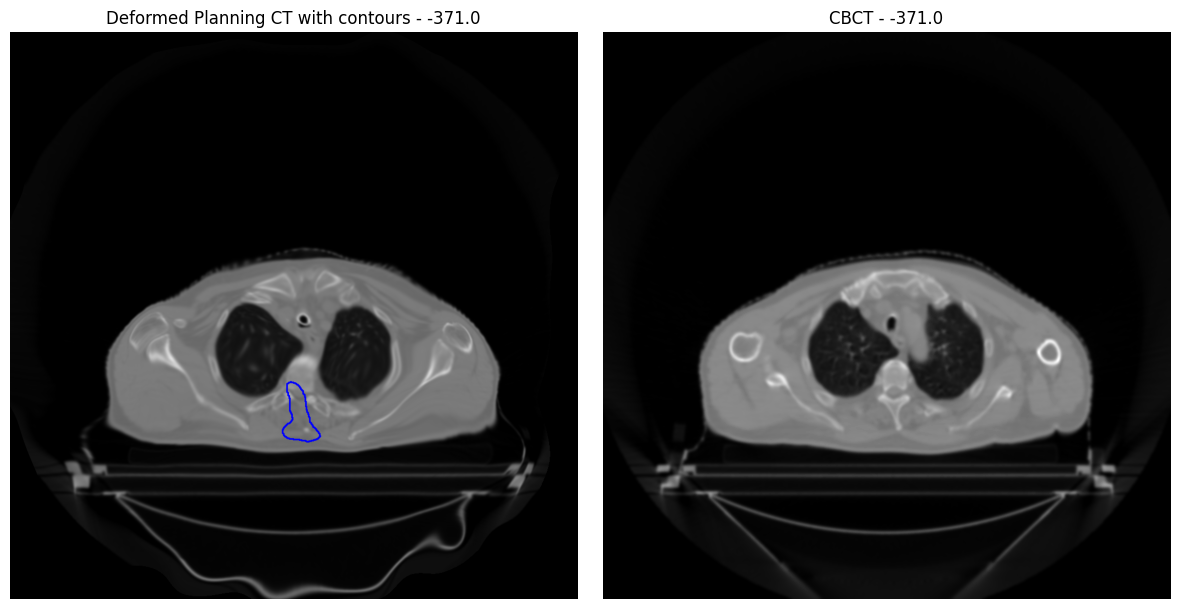

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


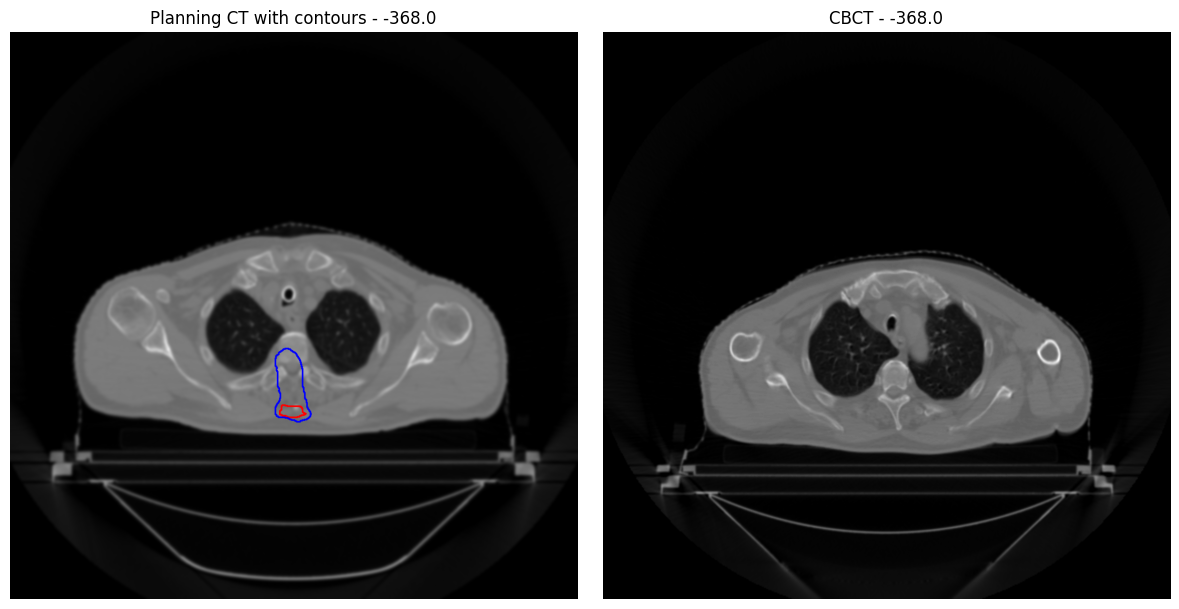

itk::simple::Euler2DTransform
 Euler2DTransform (0x7fd90b56dd90)
   RTTI typeinfo:   itk::Euler2DTransform<double>
   Reference Count: 3
   Modified Time: 1757742
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0.00033845 
     -0.00033845 1 
   Offset: [-22.0809, -22.9684]
   Center: [511.5, 511.5]
   Translation: [-21.9078, -23.1416]
   Inverse: 
     1 -0.00033845 
     0.00033845 1 
   Singular: 0
   Angle: -0.00033845

Final BSpline registration metric value: -1.0392661287020153
Optimizer's stopping condition: LBFGSBOptimizerv4: User requested
(1024, 1024)
(1024, 1024)
(1024, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


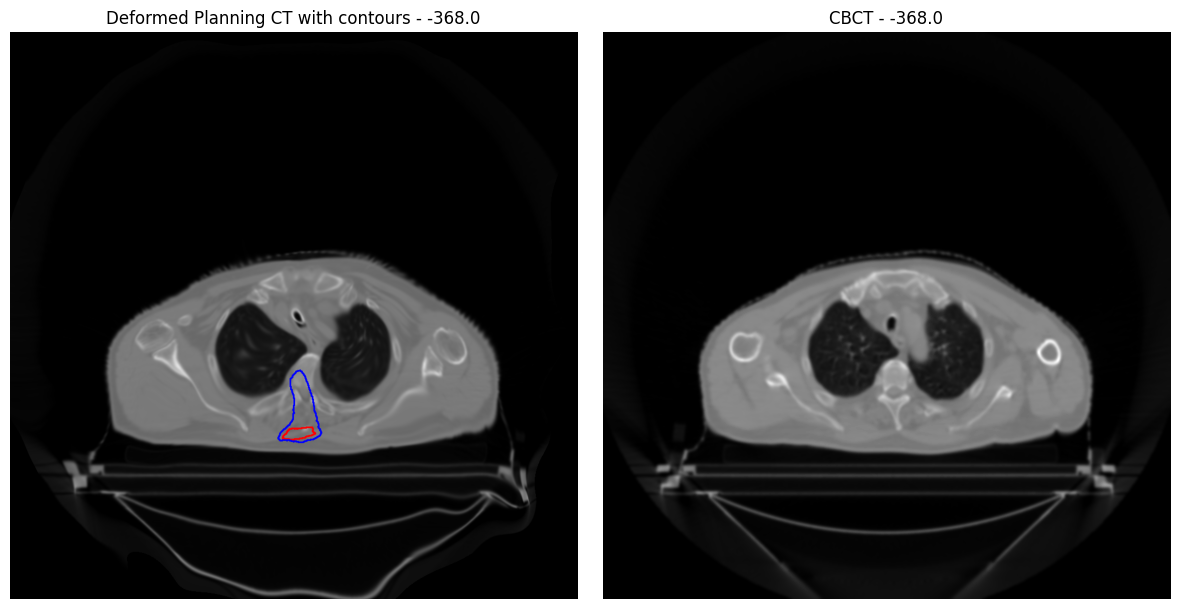

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


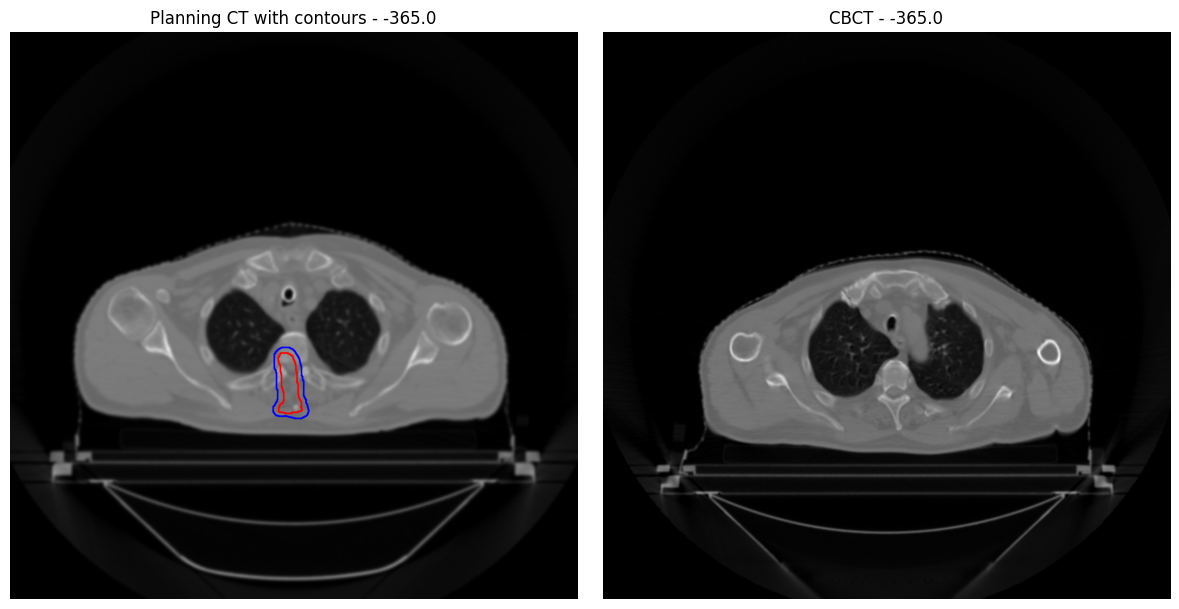

itk::simple::Euler2DTransform
 Euler2DTransform (0x7fd90b56d2c0)
   RTTI typeinfo:   itk::Euler2DTransform<double>
   Reference Count: 3
   Modified Time: 2013244
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0.000219557 
     -0.000219557 1 
   Offset: [-19.7987, -22.8766]
   Center: [511.5, 511.5]
   Translation: [-19.6864, -22.9889]
   Inverse: 
     1 -0.000219557 
     0.000219557 1 
   Singular: 0
   Angle: -0.000219557

Final BSpline registration metric value: -1.025113458939871
Optimizer's stopping condition: LBFGSBOptimizerv4: Function tolerance reached after 173 iterations. The relative reduction of the cost function <= 2.22045e-09 = CostFunctionConvergenceFactor (1e+07) * machine precision (2.22045e-16).
(1024, 1024)
(1024, 1024)
(1024, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


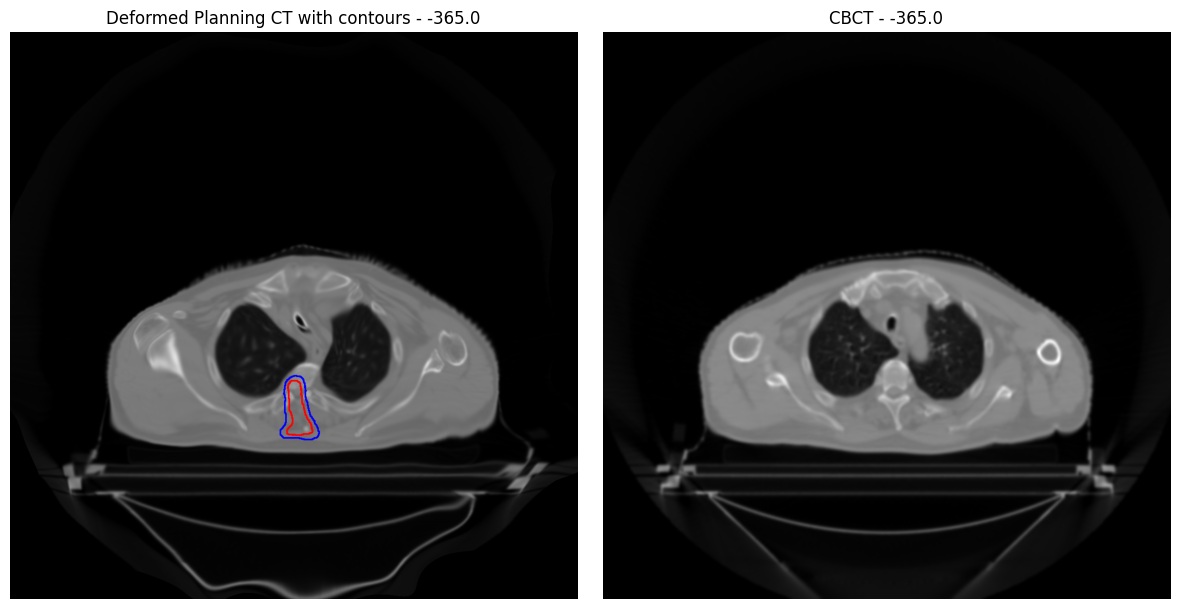

CT batch shape: torch.Size([4, 1, 1024, 1024])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


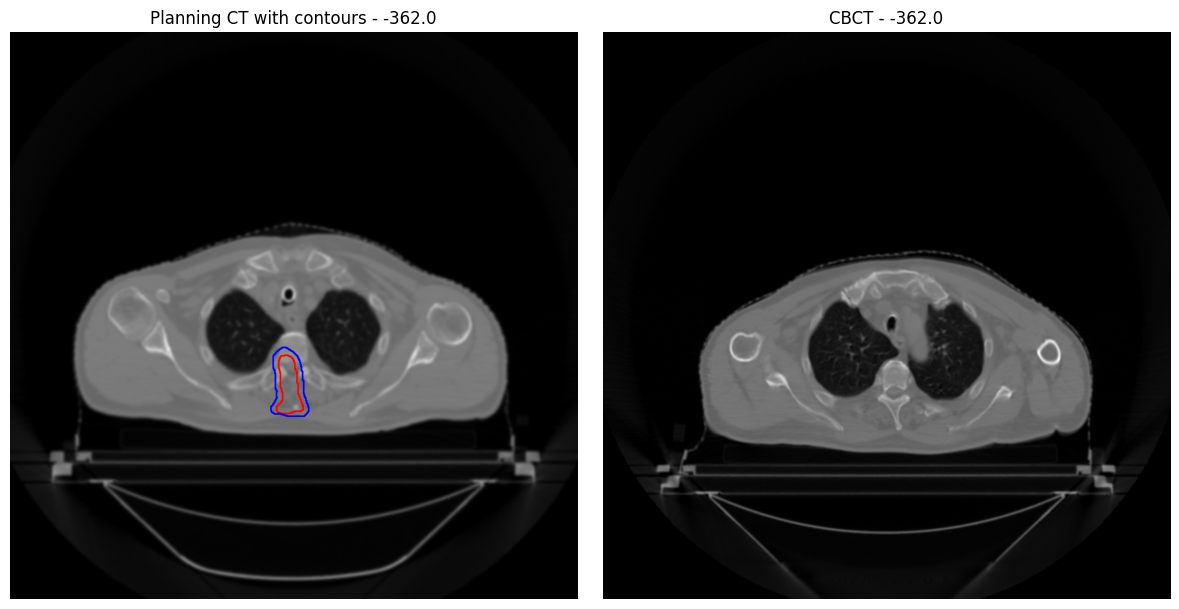

itk::simple::Euler2DTransform
 Euler2DTransform (0x7fd91c35e600)
   RTTI typeinfo:   itk::Euler2DTransform<double>
   Reference Count: 3
   Modified Time: 2268767
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0.000255482 
     -0.000255482 1 
   Offset: [-19.8834, -23.0349]
   Center: [511.5, 511.5]
   Translation: [-19.7527, -23.1656]
   Inverse: 
     1 -0.000255482 
     0.000255482 1 
   Singular: 0
   Angle: -0.000255482

Final BSpline registration metric value: -1.0085459065448554
Optimizer's stopping condition: LBFGSBOptimizerv4: User requested
(1024, 1024)
(1024, 1024)
(1024, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


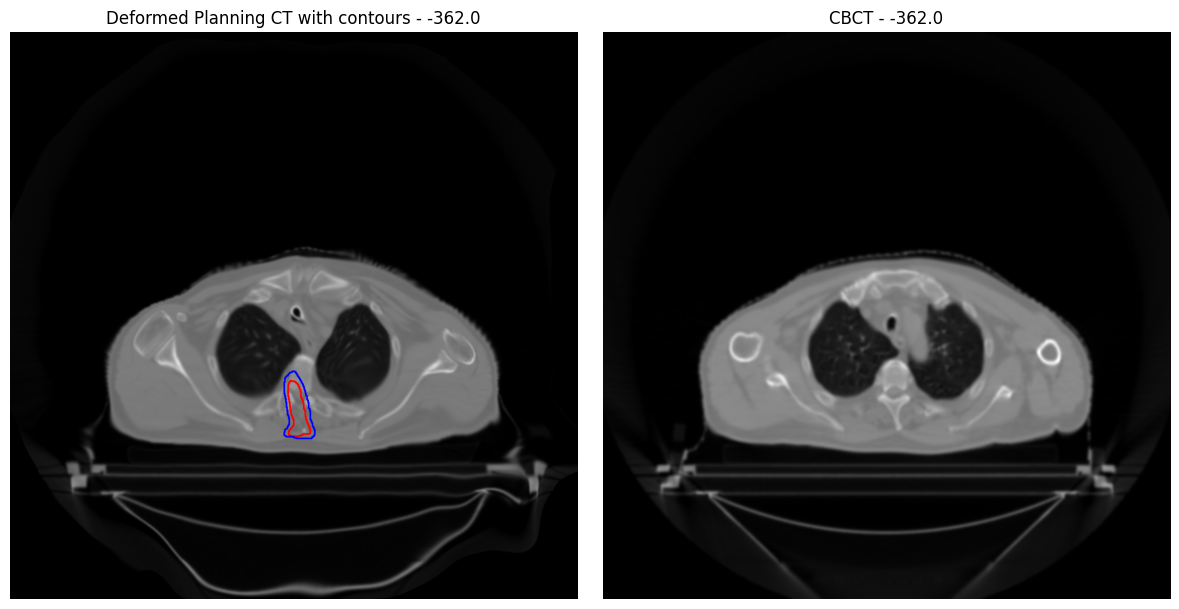

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


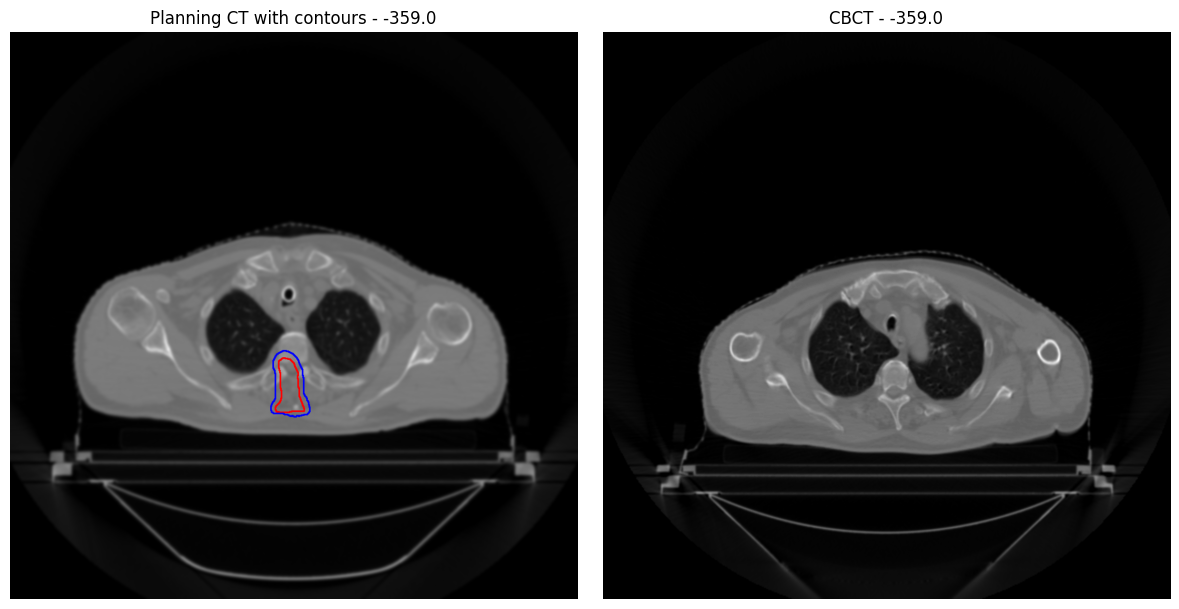

itk::simple::Euler2DTransform
 Euler2DTransform (0x7fd937bdd1b0)
   RTTI typeinfo:   itk::Euler2DTransform<double>
   Reference Count: 3
   Modified Time: 2524254
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 6.09236e-05 
     -6.09236e-05 1 
   Offset: [-18.9575, -23.3595]
   Center: [511.5, 511.5]
   Translation: [-18.9264, -23.3907]
   Inverse: 
     1 -6.09236e-05 
     6.09236e-05 1 
   Singular: 0
   Angle: -6.09236e-05

Final BSpline registration metric value: -1.029382775517032
Optimizer's stopping condition: LBFGSBOptimizerv4: User requested
(1024, 1024)
(1024, 1024)
(1024, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


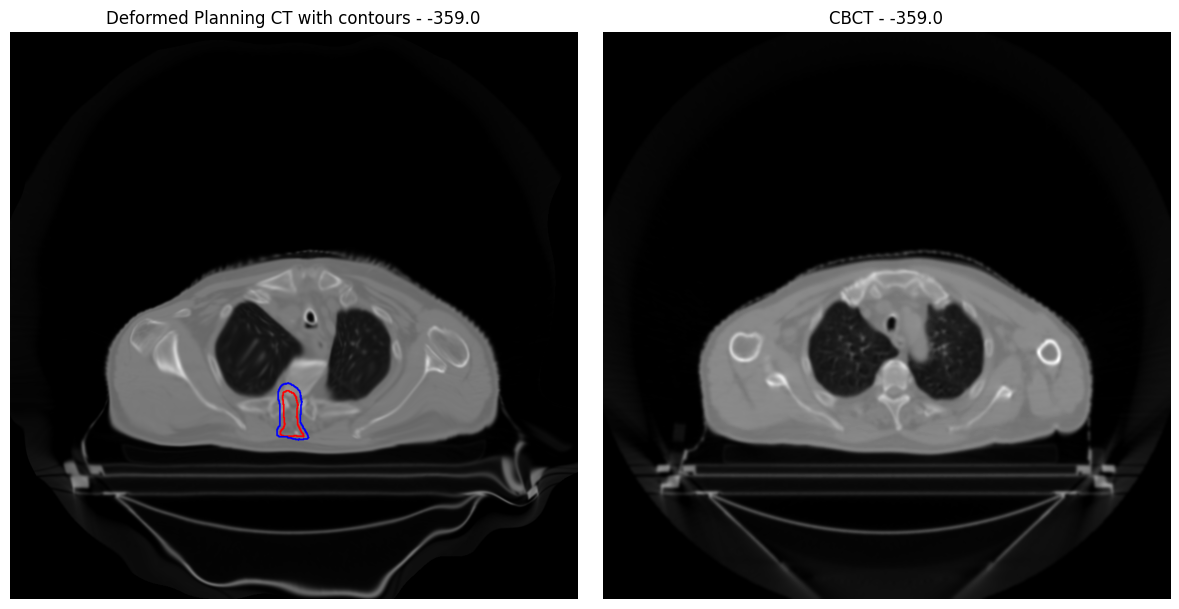

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


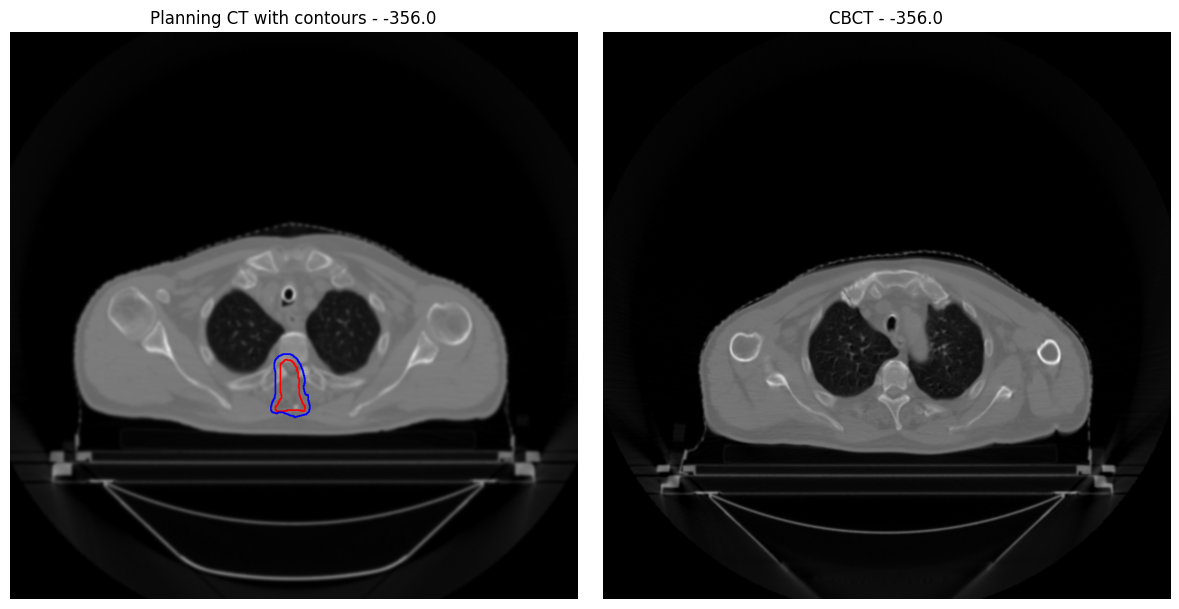

itk::simple::Euler2DTransform
 Euler2DTransform (0x7fd90b58ac90)
   RTTI typeinfo:   itk::Euler2DTransform<double>
   Reference Count: 3
   Modified Time: 2779762
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0.000190064 
     -0.000190064 1 
   Offset: [-19.5807, -23.2116]
   Center: [511.5, 511.5]
   Translation: [-19.4835, -23.3088]
   Inverse: 
     1 -0.000190064 
     0.000190064 1 
   Singular: 0
   Angle: -0.000190064

Final BSpline registration metric value: -0.9907507760527494
Optimizer's stopping condition: LBFGSBOptimizerv4: Function tolerance reached after 150 iterations. The relative reduction of the cost function <= 2.22045e-09 = CostFunctionConvergenceFactor (1e+07) * machine precision (2.22045e-16).
(1024, 1024)
(1024, 1024)
(1024, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


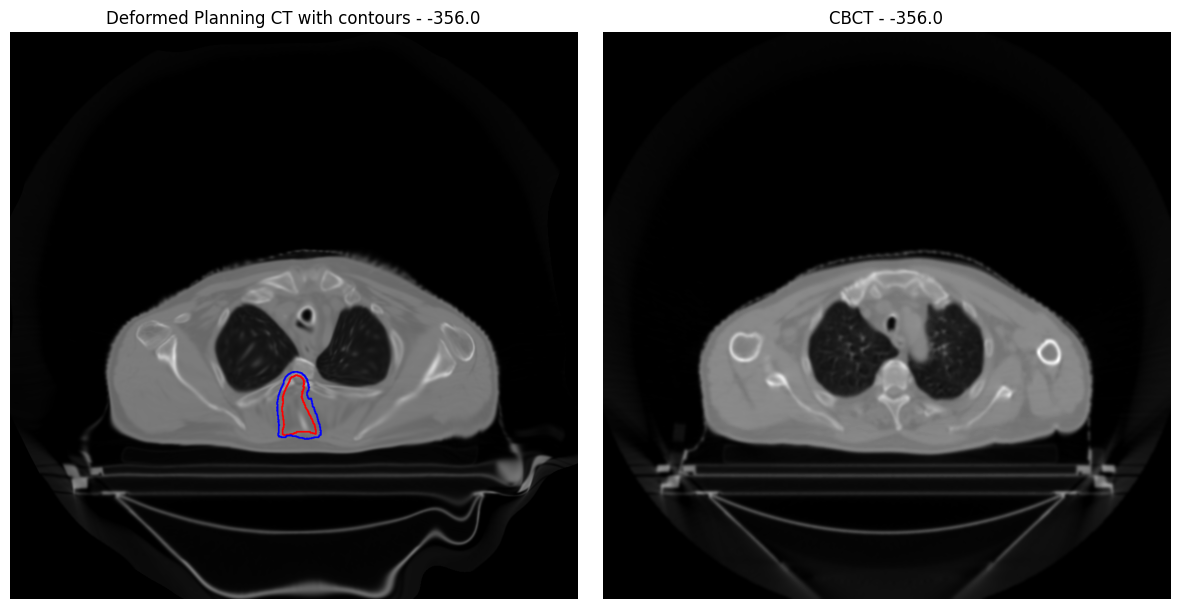

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


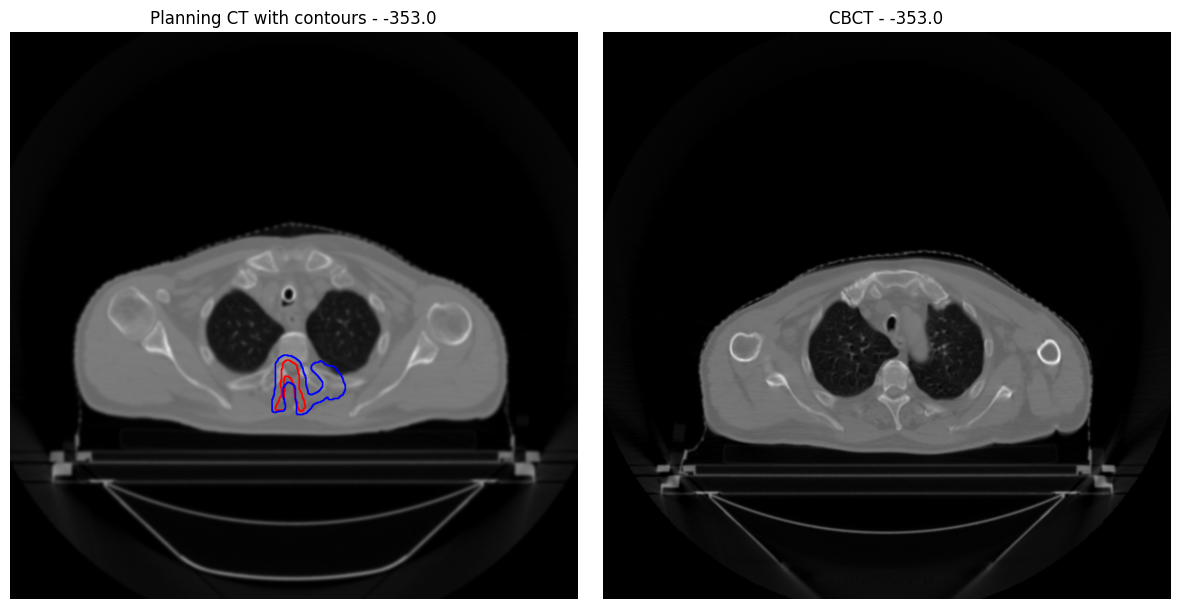

itk::simple::Euler2DTransform
 Euler2DTransform (0x7fd8cbe0cb60)
   RTTI typeinfo:   itk::Euler2DTransform<double>
   Reference Count: 3
   Modified Time: 3035258
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0.000326659 
     -0.000326659 1 
   Offset: [-20.6483, -23.4492]
   Center: [511.5, 511.5]
   Translation: [-20.4813, -23.6163]
   Inverse: 
     1 -0.000326659 
     0.000326659 1 
   Singular: 0
   Angle: -0.000326659

Final BSpline registration metric value: -1.057670517475953
Optimizer's stopping condition: LBFGSBOptimizerv4: User requested
(1024, 1024)
(1024, 1024)
(1024, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


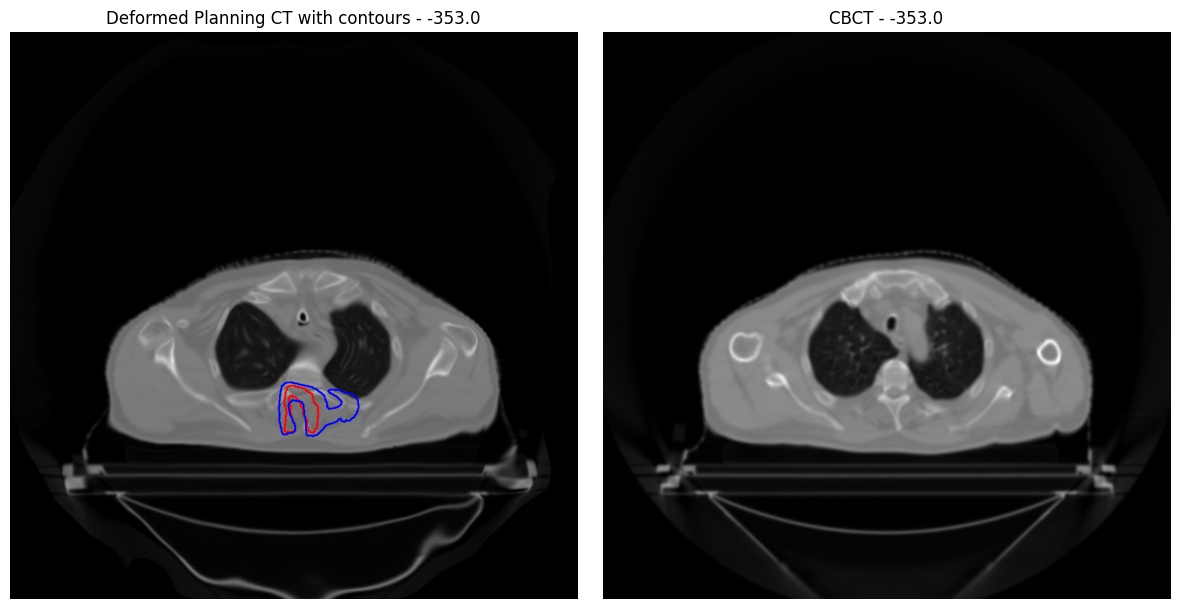

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


CT batch shape: torch.Size([4, 1, 1024, 1024])


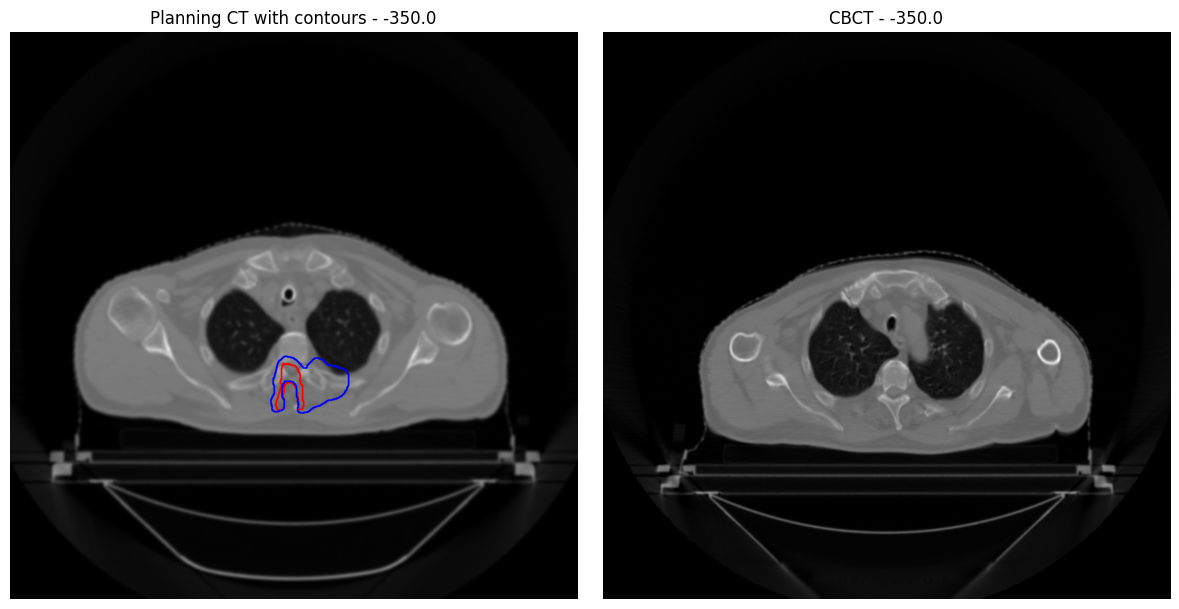

itk::simple::Euler2DTransform
 Euler2DTransform (0x7fd8cbe157e0)
   RTTI typeinfo:   itk::Euler2DTransform<double>
   Reference Count: 3
   Modified Time: 3290826
   Debug: Off
   Object Name: 
   Observers: 
     none
   Matrix: 
     1 0.000442683 
     -0.000442683 1 
   Offset: [-21.8802, -22.909]
   Center: [511.5, 511.5]
   Translation: [-21.6538, -23.1355]
   Inverse: 
     1 -0.000442683 
     0.000442683 1 
   Singular: 0
   Angle: -0.000442683



KeyboardInterrupt: 

In [ ]:
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from tranformation_utils import *

dataloader = DataLoader(dataset, batch_size=4, shuffle=False)
ct1 = None
ct2 = None
for i, batch in enumerate(dataloader):
    # if i != 2:
    #     continue
    # print(f"1 Batch shape: {batch['item1']['ct'].shape}")
    # #display(batch["item2"]["ct"])
    # print(f"2 Batch shape: {batch['item1']['ct'].shape}")
    
    ct_batch1 = batch["item1"]["ct"]
    ct_batch2 = batch["item2"]["ct"]
    z_positions = batch["item1"]["z_position"]
    #print(batch["item1"])
    batch_masks = batch["item1"]["masks"]


    y_cutoff = 500 * int(size / 128)

    print(f"CT batch shape: {ct_batch1.shape}")
    for i in range(ct_batch1.shape[0]):
        # Convert tensors to NumPy arrays
        ct_img1 = ct_batch1[i, 0].detach().cpu().numpy()  # [H, W]
        ct_img2 = ct_batch2[i, 0].detach().cpu().numpy()
        z_pos = z_positions[i].item() if hasattr(z_positions[i], "item") else z_positions[i]
        masks = batch_masks[i].detach().cpu().numpy()

        
        # Convert to SimpleITK images
        planning_ct_img = sitk.GetImageFromArray(ct_img1)
        cbct_img = sitk.GetImageFromArray(ct_img2)

        # Apply smoothing
        smoothed_planning = sitk.SmoothingRecursiveGaussian(planning_ct_img, sigma=2.0)
        smoothed_cbct = sitk.SmoothingRecursiveGaussian(cbct_img, sigma=2.0)
        
        planning_with_contours = draw_contours(sitk.GetArrayFromImage(smoothed_planning), masks)
        plot_images_np(planning_with_contours, ct_img2, title=f"Planning CT with contours - {z_pos}", title2=f"CBCT - {z_pos}")
        
        # Convert to SimpleITK image
        # Perform rigid registration
        global_transform = perform_rigid_registration_v2(smoothed_cbct, smoothed_planning)

        # Align the planning CT to the CBCT using the global transform
        moved_planning_ct = sitk.Resample(
            smoothed_planning,
            smoothed_cbct,
            global_transform,
            sitk.sitkLinear,
            0,
            smoothed_planning.GetPixelID()
        )
       
        
        # break
        fixed_image = smoothed_cbct   # e.g., CBCT (fixed)
        moving_image = moved_planning_ct   # e.g., Planning CT (moving)

        # Perform deformable registration.
        final_bspline_transform = perform_bspline_registration(fixed_image, moving_image, grid_physical_spacing=[50.0, 50.0, 50.0], number_of_iterations=50)

        # Apply the BSpline transform to get the deformed (fused) image.
        deformed_planned_ct = resample_with_transform(moving_image, fixed_image, final_bspline_transform)
        transformed_masks = transform_masks(masks, fixed_image, global_transform, final_bspline_transform)
        deformed_with_contours = draw_contours(sitk.GetArrayFromImage(deformed_planned_ct), transformed_masks)
        
        fixed_image_np = sitk.GetArrayFromImage(fixed_image)
        deformed_with_contours[y_cutoff:, :] = (0, 0, 0)
        fixed_image_np[y_cutoff:, :] = 0
        
        plot_images_np(deformed_with_contours, fixed_image_np, title=f"Deformed Planning CT with contours - {z_pos}", title2=f"CBCT - {z_pos}")
        

        # Convert registered images back to NumPy
        # ct_img1_np = sitk.GetArrayFromImage(smoothed_planning)
        # ct_img2_np = sitk.GetArrayFromImage(moving_image_global_aligned)
        # ct_img1_bin = np.where(ct_img1_np > 0.2, 1, 0)
        # ct_img2_bin = np.where(ct_img2_np > 0.2, 1, 0)
        # plt.imshow(ct_img1_bin, cmap="gray")
        # plt.imshow(ct_img2_bin, cmap="gray")
        # plt.show()
        
        
        continue

        # Apply cutoff
        ct_img1_np[y_cutoff:, :] = 0
        ct_img2_np[y_cutoff:, :] = 0
        
        
        

        # Thresholding
        ct_img1_bin = np.where(ct_img1_np > 0.2, 1, 0)
        ct_img2_bin = np.where(ct_img2_np > 0.2, 1, 0)

        # Difference mask
        diff_mask = (ct_img1_bin != ct_img2_bin).astype(np.uint8)

        # Red overlay for visualization
        overlay = np.stack(
            [diff_mask * 255, np.zeros_like(diff_mask), np.zeros_like(diff_mask)],
            axis=-1,
        )

        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        axs[0].imshow(ct_img1_bin, cmap="gray")
        axs[0].set_title(f"Item1 - Z: {z_pos} | Y Cutoff: {y_cutoff}")
        axs[0].axis("off")

        axs[1].imshow(ct_img2_bin, cmap="gray")
        axs[1].set_title(f"Item2 - Z: {z_pos} | Y Cutoff: {y_cutoff}")
        axs[1].axis("off")

        # Difference ratio
        num_diff_pixels = np.sum(diff_mask)
        num_white_pixels_img1 = np.sum(ct_img1_bin == 1)
        num_white_pixels_img2 = np.sum(ct_img2_bin == 1)

        if (num_white_pixels_img1 + num_white_pixels_img2) > 0:
            diff_ratio = num_diff_pixels / (
                (num_white_pixels_img1 + num_white_pixels_img2) / 2
            )
        else:
            diff_ratio = 0.0

        axs[2].imshow(ct_img1_bin, cmap="gray")
        axs[2].imshow(overlay, alpha=0.6)
        axs[2].set_title(f"Diffs (red) | Ratio: {diff_ratio:.4f}")
        axs[2].axis("off")

        print(
            f"Item {i} - Z: {z_pos} | Diff Pixels: {num_diff_pixels}, "
            f"White Pixels (img2): {num_white_pixels_img2}, Ratio: {diff_ratio:.4f}"
        )

        plt.tight_layout()
        plt.show()
        break
    


In [ ]:
import cv2 

def draw_contours(img, masks):
    ct_img_colored = np.stack([img, img, img], axis=-1)
    colors = ['orange', 'red', 'blue']
    colors_rgb = {'orange': [1.0, 0.65, 0], 'red': [1.0, 0, 0], 'blue': [0, 0, 1.0]}
    
    for i in range(3):
        mask_layer = masks[i]
        # Convert to uint8 for findContours
        mask_uint8 = (mask_layer * 255).astype(np.uint8)
        contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # Draw contours in the corresponding color
        color = colors_rgb[colors[i]]
        for contour in contours:
            cv2.drawContours(ct_img_colored, [contour], -1, color, 2)
    return ct_img_colored
    

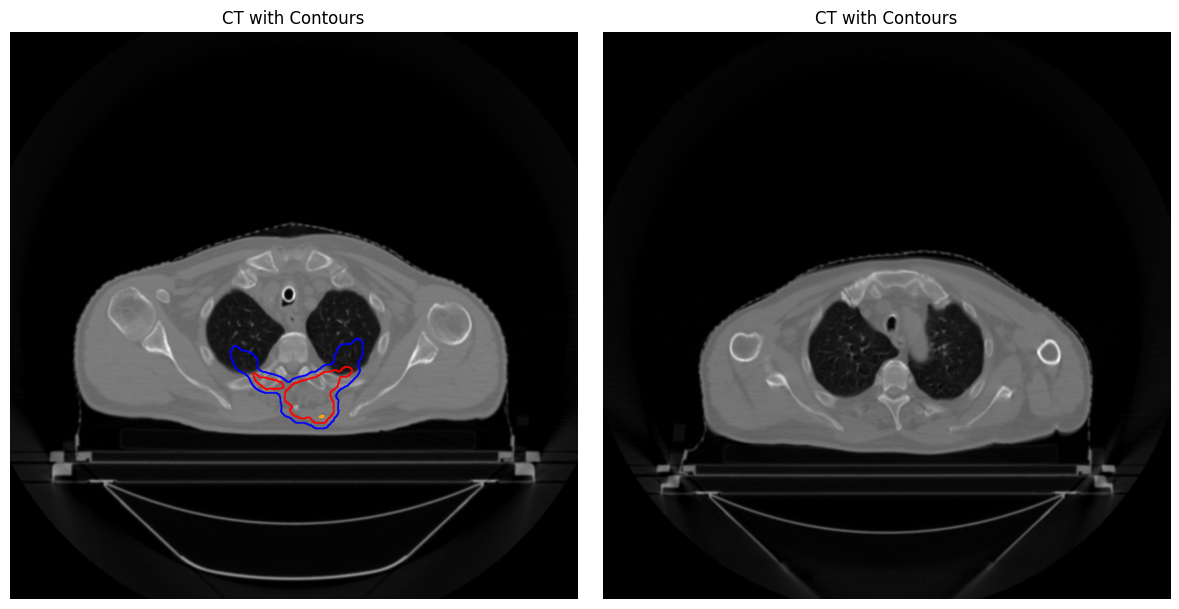

In [ ]:
import cv2

batch_masks = batch["item1"]["masks"]
batch_masks = batch_masks.detach().cpu().numpy() 
masks = batch_masks[0]  # Assuming batch size is 1

ct_img_colored = draw_contours(ct_img1, masks)

plot_images_np(ct_img_colored, ct_img2, title='CT with Contours', title2='CT with Contours')


In [ ]:
def transform_masks(masks, fixed_image, global_transform, final_bspline_transform ):
    transformed_masks = []
    for mask in masks:
        print(mask.shape)
        # Convert to SimpleITK image
        mask_sitk = sitk.GetImageFromArray(mask)
        moved_mask = sitk.Resample(
            mask_sitk,
            fixed_image,
            global_transform,
            sitk.sitkLinear,
            0,
            mask_sitk.GetPixelID()
        )
        # Resample the mask using the transform
        deformed_mask = resample_with_transform(moved_mask, fixed_image, final_bspline_transform)

        transformed_masks.append(sitk.GetArrayFromImage(deformed_mask))
    return np.array(transformed_masks)

transformed_masks = transform_masks(masks, fixed_image, global_transform, final_bspline_transform)
# ct_transformed_mask = draw_contours(fused_deformed_image, masks)
# plot_images_np(ct_transformed_mask, ct_img_colored, title='CT with Contours', title2='CT with Contours')


(1024, 1024)


(1024, 1024)
(1024, 1024)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


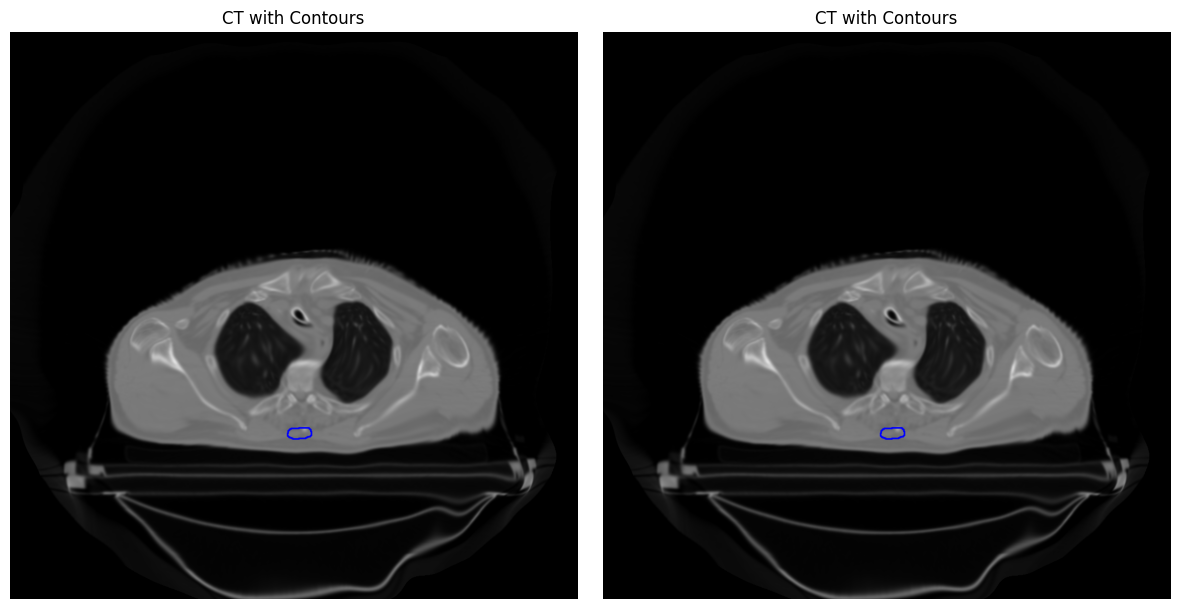

In [ ]:



# ct_transformed_mask = draw_contours(sitk.GetArrayFromImage(fused_deformed_image), transformed_masks)
plot_images_np(deformed_with_contours, deformed_with_contours, title='CT with Contours', title2='CT with Contours')